In [24]:
import numpy as np    ## Importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [25]:
## Importing the data files into the notebook

In [26]:
songs_90s = pd.read_csv('spotify_songs_1990.csv')
songs_2000s = pd.read_csv('spotify_songs_2000.csv')
songs_2010s= pd.read_csv('spotify_songs_2010.csv')

In [27]:
## Forming a new combined data frame with all the three decades

In [28]:
songs_90s['decade'] = 1990
songs_2000s['decade'] = 2000
songs_2010s ['decade'] = 2010

In [29]:
df = [songs_90s, songs_2000s, songs_2010s]
songs_df = pd.concat(df) #combines all the decade dataframes
print(songs_df['decade'].unique()) 

[1990 2000 2010]


In [30]:
## Checeking the head of the dataframe

In [31]:
songs_df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0,1990
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1,1990
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0,1990
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0,1990
4,Ð”Ð¾ ÑÐ¼ÐµÑ€Ñ‚Ñ– Ñ– Ð´Ð¾Ð²ÑˆÐµ - Drum & Base ...,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0,1990


In [32]:
pd.isnull(songs_df).sum()   ## Checking for null values in the data frame

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
decade              0
dtype: int64

In [10]:
## Creating two lists of features: one with spotify features and one with song traits

In [33]:
spotifyfeatures = ['danceability', 'energy', 'key', 'loudness','mode', 'speechiness', 'acousticness', 
                       'instrumentalness', 'liveness','valence']
song_traits = ['key', 'loudness','tempo', 'time_signature', 'chorus_hit','sections'] 

In [34]:
hit_songs = songs_df[spotifyfeatures].loc[songs_df['target'] == 1]
flop_songs = songs_df[spotifyfeatures].loc[songs_df['target'] == 0]

In [35]:
### finding mean value of spotify features, each for hitsongs and flopsongs

In [36]:
hit_means = pd.DataFrame(hit_songs.describe().loc['mean'])
flop_means = pd.DataFrame(flop_songs.describe().loc['mean'])
means_joined = pd.concat([hit_means,flop_means], axis = 1)
means_joined.columns = ['hit_mean', 'flop_mean']

means_joined

,hit_mean,flop_mean
danceability,0.640024,0.478880
energy,0.685306,0.627175
key,5.335020,5.214414
loudness,-6.631530,-10.097551
mode,0.670826,0.634810
speechiness,0.095196,0.082193
acousticness,0.159774,0.318535
instrumentalness,0.014353,0.303421
liveness,0.183355,0.209945
valence,0.540854,0.430387


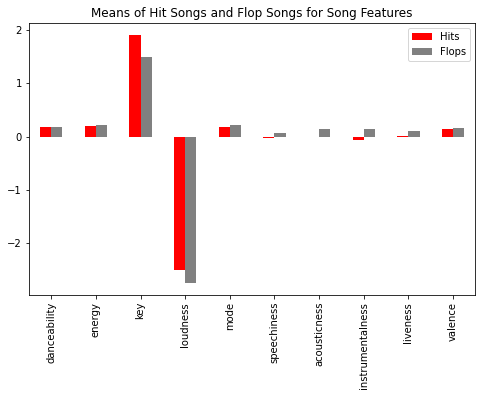

In [37]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
means_joined_scaled = pd.DataFrame(ss.fit_transform(means_joined),index= means_joined.index, columns = means_joined.columns)
means_joined_scaled


means_joined_scaled.plot(kind = 'bar', figsize=(8, 5), color = ('red', 'grey'), title = 'Means of Hit Songs and Flop Songs for Song Features')
plt.legend(labels=['Hits', 'Flops'], loc='upper right')
plt.show()
plt.show()


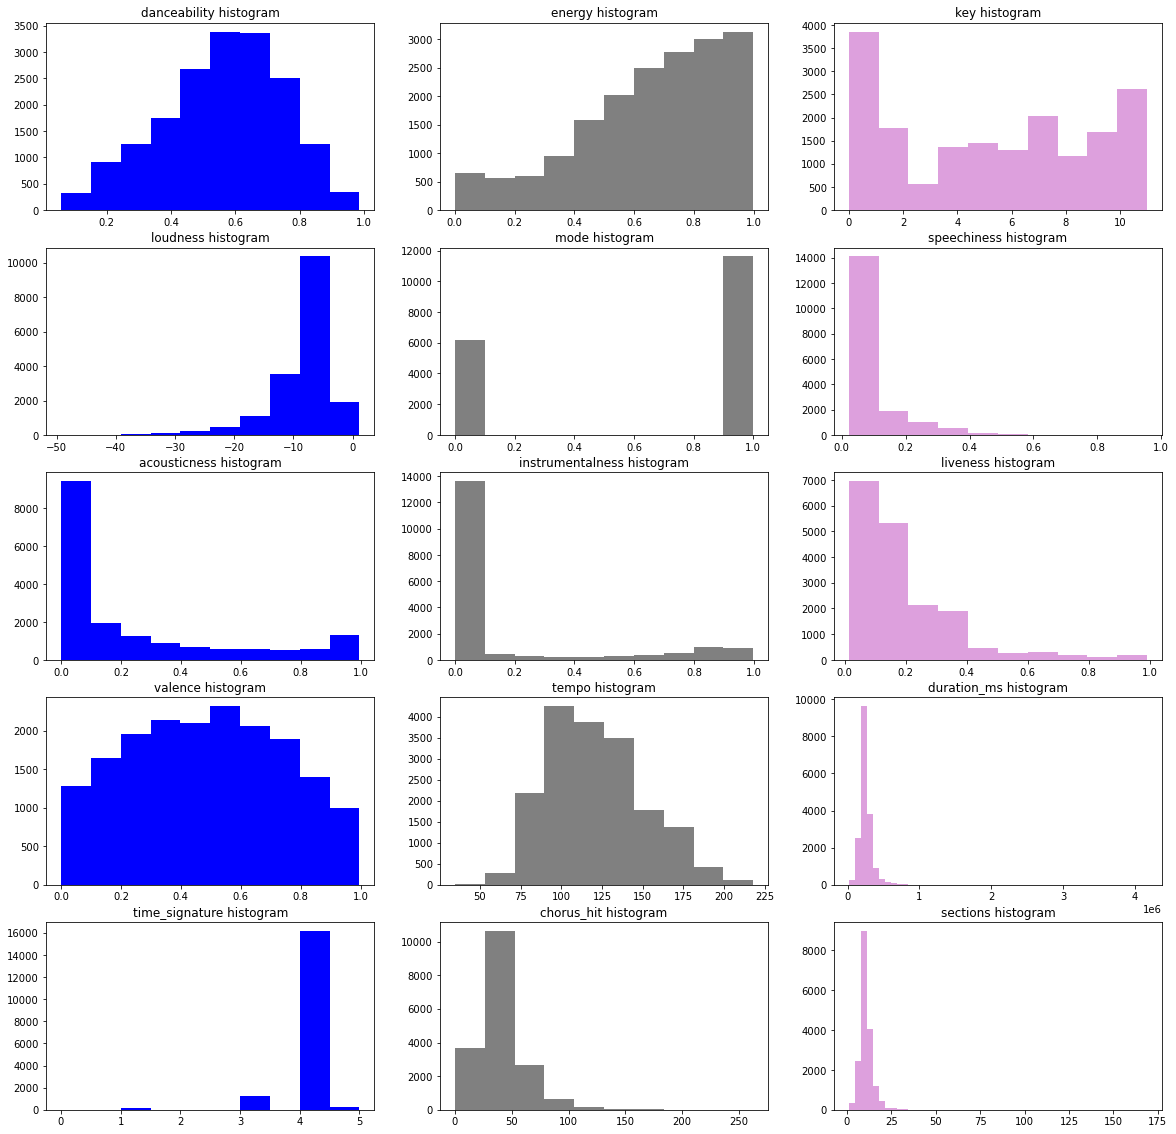

In [38]:
fig, ax = plt.subplots(5,3, figsize=(20,20))

def hist_plot(row, column, variable, binsnum, color):
    ax[row, column].hist(songs_df[variable], bins = binsnum, color = color)
    ax[row, column].set_title(variable + ' histogram')
    
hist_plot(0, 0, 'danceability', 10, 'blue')
hist_plot(0, 1, 'energy', 10, 'grey')
hist_plot(0, 2, 'key', 10, 'plum')
hist_plot(1,0, 'loudness', 10, 'blue')
hist_plot(1,1, 'mode', 10, 'grey')
hist_plot(1,2, 'speechiness', 10, 'plum')
hist_plot(2,0, 'acousticness', 10, 'blue')
hist_plot(2,1, 'instrumentalness', 10, 'grey')
hist_plot(2,2, 'liveness', 10, 'plum')
hist_plot(3,0, 'valence', 10, 'blue')
hist_plot(3,1, 'tempo', 10, 'grey')
hist_plot(3,2, 'duration_ms', 50, 'plum')
hist_plot(4,0, 'time_signature', 10, 'blue')
hist_plot(4,1, 'chorus_hit', 10, 'grey')
hist_plot(4,2, 'sections', 50, 'plum')

plt.show()

In [17]:
#### Predicting Hit Songs and important features using Random Forest Classifier

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

input_cols = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections']

X = songs_df[input_cols]
y = songs_df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0) 
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [40]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2117,  540],
       [ 332, 2348]], dtype=int64)

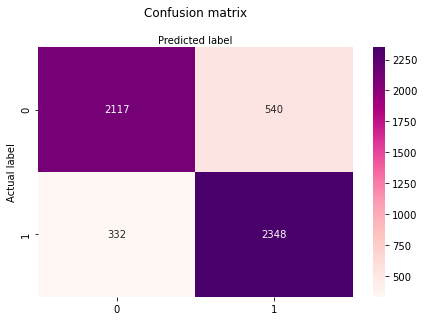

In [41]:

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [44]:
from sklearn import metrics
print("Accuracy using Random Forest Classifier is:", metrics.accuracy_score(y_test,y_pred))
print("\n******\n")
print(metrics.classification_report(y_test,y_pred))

Accuracy using Random Forest Classifier is: 0.8366123290237961

******

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2657
           1       0.81      0.88      0.84      2680

    accuracy                           0.84      5337
   macro avg       0.84      0.84      0.84      5337
weighted avg       0.84      0.84      0.84      5337



In [21]:
## feature Importance using Recusrive Feature Elimination ##

In [45]:
from sklearn.feature_selection import RFECV
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, scoring='accuracy')
rfecv.fit(X_train, y_train)
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 15


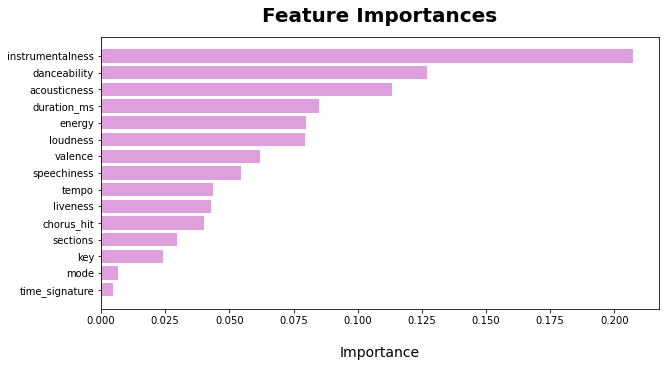

In [49]:
dset_all = pd.DataFrame()
dset_all['attribute'] = X_train.columns
dset_all['importance'] = rfecv.estimator_.feature_importances_

dset_all = dset_all.sort_values(by='importance', ascending=True)


plt.figure(figsize=(10, 5))
plt.barh(y=dset_all['attribute'], width=dset_all['importance'], color='plum')
plt.title('Feature Importances', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8366123290237961
Precision: 0.8130193905817175
Recall: 0.8761194029850746


In [ ]:
### Decade 1990

In [51]:
X = songs_90s[input_cols]
y = songs_90s['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[562, 134],
       [ 95, 589]], dtype=int64)

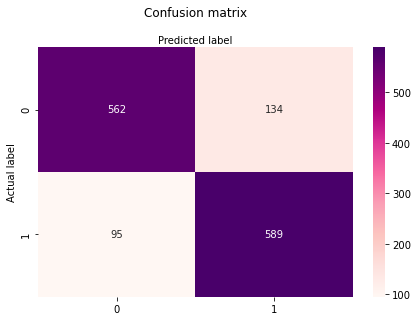

In [52]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [57]:
print("Accuracy with 1990 decade dataset using Random Forest Classifier is:", metrics.accuracy_score(y_test,y_pred))
print("\n****")
      
print(metrics.classification_report(y_test,y_pred))

Accuracy with 1990 decade dataset using Random Forest Classifier is: 0.8340579710144927

****
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       696
           1       0.81      0.86      0.84       684

    accuracy                           0.83      1380
   macro avg       0.84      0.83      0.83      1380
weighted avg       0.84      0.83      0.83      1380



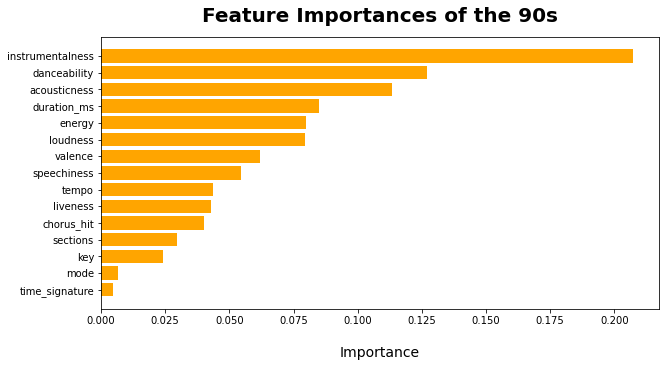

In [59]:
dset_90s = pd.DataFrame()
dset_90s['attribute'] = X_train.columns
dset_90s['importance'] = rfecv.estimator_.feature_importances_

dset_90s = dset_90s.sort_values(by='importance', ascending=True)


plt.figure(figsize=(10, 5))
plt.barh(y=dset_90s['attribute'], width=dset_90s['importance'], color='orange')
plt.title('Feature Importances of the 90s', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
## Decade 2000s

In [60]:
X = songs_2000s[input_cols]
y = songs_2000s['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[612, 116],
       [ 90, 650]], dtype=int64)

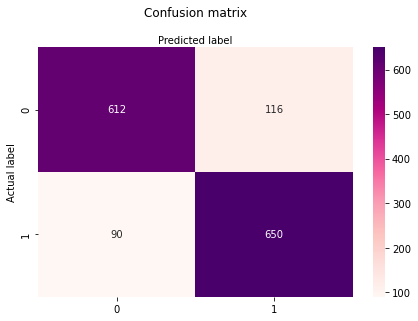

In [61]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [62]:
print("Accuracy with 2000 decade dataset using Random Forest Classifier is:", metrics.accuracy_score(y_test,y_pred))
print("\n****")
      
print(metrics.classification_report(y_test,y_pred))

Accuracy with 2000 decade dataset using Random Forest Classifier is: 0.8596730245231607

****
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       728
           1       0.85      0.88      0.86       740

    accuracy                           0.86      1468
   macro avg       0.86      0.86      0.86      1468
weighted avg       0.86      0.86      0.86      1468



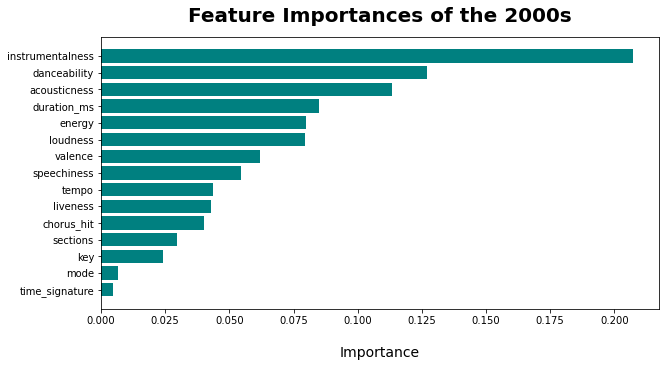

In [64]:
dset_2000s = pd.DataFrame()
dset_2000s['attribute'] = X_train.columns
dset_2000s['importance'] = rfecv.estimator_.feature_importances_

dset_2000s = dset_2000s.sort_values(by='importance', ascending=True)


plt.figure(figsize=(10, 5))
plt.barh(y=dset_2000s['attribute'], width=dset_2000s['importance'], color='#008080')
plt.title('Feature Importances of the 2000s', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
## Decade 2010s

In [65]:
X = songs_2010s[input_cols]
y = songs_2010s['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[645, 138],
       [103, 714]], dtype=int64)

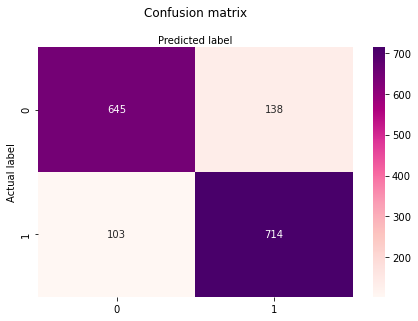

In [66]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

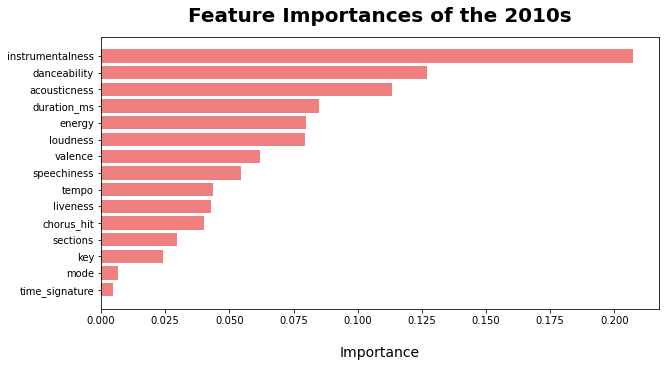

In [69]:
dset_2010s = pd.DataFrame()
dset_2010s['attribute'] = X_train.columns
dset_2010s['importance'] = rfecv.estimator_.feature_importances_

dset_2010s = dset_2010s.sort_values(by='importance', ascending=True)


plt.figure(figsize=(10, 5))
plt.barh(y=dset_2010s['attribute'], width=dset_2010s['importance'], color='#F08080')
plt.title('Feature Importances of the 2010s', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [67]:
print("Accuracy with 2010 decade dataset using Random Forest Classifier is:", metrics.accuracy_score(y_test,y_pred))
print("\n****")
      
print(metrics.classification_report(y_test,y_pred))

Accuracy with 2010 decade dataset using Random Forest Classifier is: 0.849375

****
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       783
           1       0.84      0.87      0.86       817

    accuracy                           0.85      1600
   macro avg       0.85      0.85      0.85      1600
weighted avg       0.85      0.85      0.85      1600



In [70]:
compare_feats = dset_all + dset_90s + dset_2000s + dset_2010s
compare_feats_df = pd.concat([dset_all, dset_90s, dset_2000s, dset_2010s], axis = 1)
compare_feats_df


,attribute,importance,attribute,importance,attribute,importance,attribute,importance
12,time_signature,0.004785,time_signature,0.004785,time_signature,0.004785,time_signature,0.004785
4,mode,0.006752,mode,0.006752,mode,0.006752,mode,0.006752
2,key,0.024046,key,0.024046,key,0.024046,key,0.024046
14,sections,0.029427,sections,0.029427,sections,0.029427,sections,0.029427
13,chorus_hit,0.040030,chorus_hit,0.040030,chorus_hit,0.040030,chorus_hit,0.040030
8,liveness,0.042964,liveness,0.042964,liveness,0.042964,liveness,0.042964
10,tempo,0.043704,tempo,0.043704,tempo,0.043704,tempo,0.043704
5,speechiness,0.054569,speechiness,0.054569,speechiness,0.054569,speechiness,0.054569
9,valence,0.061996,valence,0.061996,valence,0.061996,valence,0.061996
3,loudness,0.079568,loudness,0.079568,loudness,0.079568,loudness,0.079568


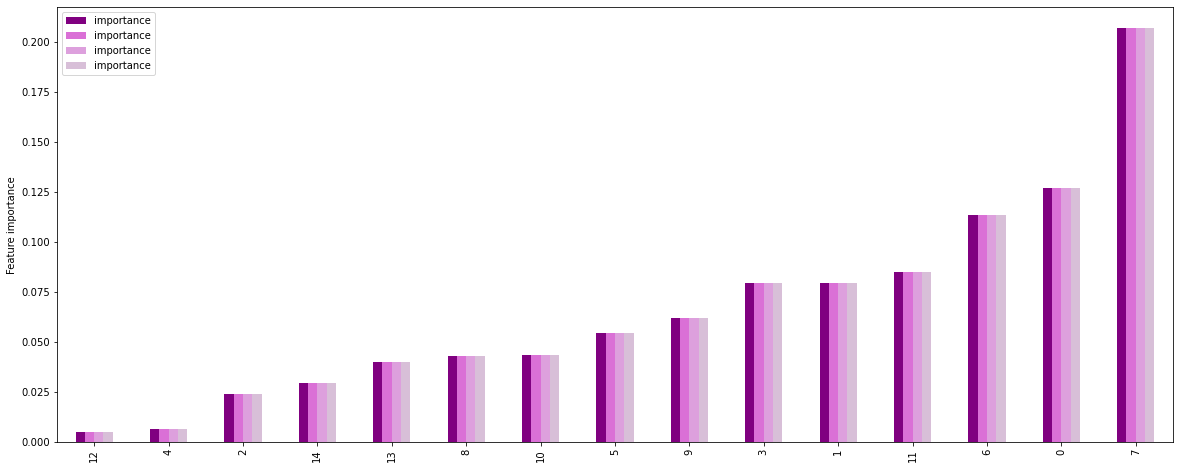

In [71]:
compare_feats_df.plot(kind='bar', color = ('purple','orchid','plum','thistle' ), figsize = (20,8))
plt.ylabel("Feature importance")
plt.show()